<a href="https://colab.research.google.com/github/solozano0725/diplomadoMLNivel1/blob/main/DipMLsesion21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

# **Diplomado de Análisis de datos y Machine Learning en Python**


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

## **Sesión 21**

## **Contenido**

- <a href="#arb"> Árboles de decisión</a><br>
- <a href="#ens"> Métodos de ensamble</a><br>
  - <a href="#bag"> *Bagging*</a><br>
  - <a href="#bos"> Bosques aleatorios</a><br>
  - <a href="#boo"> *Boosting*</a><br>




<p><a name="arb"></a></p>

# **Árboles de decisión**

Los árboles de decisión son algoritmos que pueden ser usados tanto para clasificación como para regresión. Consisten en una secuencia de preguntas si/si no (if/else) que llevan a la decisión final.

Suponga que se deseamos clasificar los siguientes cuatro animales: Águila, Pingüino, Delfíny Oso, donde tenemos información sobre si el animal tiene plumas, aletas, si puede nadar o volar. 


<p><img alt="Colaboratory logo" height="400px" src="https://i.imgur.com/4Zn7clc.jpg" align="center" hspace="10px" vspace="0px"></p>

Podríamos construir un árbol con la siguiente forma

![](https://i.imgur.com/xEgoyNW.png)

En esta ilustración, cada nodo del árbol representa una pregunta o un nodo terminal que contiene la respuesta. La primer pregunta define lo que se conoce como el *nodo raíz*. Cada nodo del digrama anterior también es llamado hoja (*leaf*). Las últimas hojas se conocen como hojas puras, ya que contienen instancias de una única clase.

Tan solo haciendo tres preguntas, en dos niveles, es posible identificar a que animal corresponde una instancia particular. En el lenguaje del ML podemos decir entonces que tenemos cuatro clases: Águila, Pingüino, Delfín y Oso, y son necesarias las siguientes tres características para poder hacer la clasificación: tener plumas, poder volar y tener aletas. 

Note que podemos construir diferentes árboles, dependiendo de la pregunta inicial que hagamos. En lugar de construir estos modelos a mano, podemos aprenderlos a partir de los datos mediante el aprendizaje supervisado.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, validation_curve, cross_val_score
from mlxtend.plotting import plot_decision_regions

Veamos el proceso de creación de un árbol de decisión para el conjunto de datos Iris:


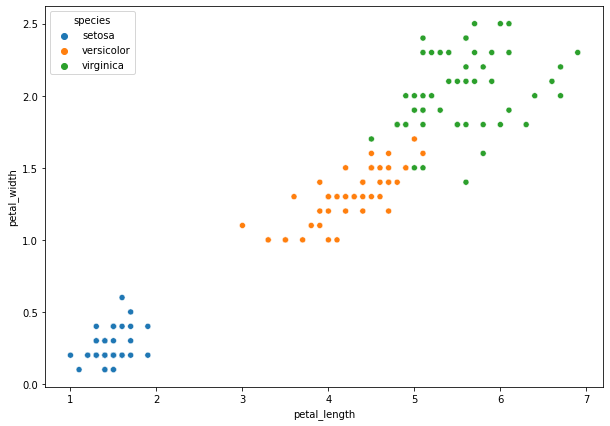

In [ ]:
data = sns.load_dataset("iris") 

X = data[["petal_length","petal_width"]]
y = data["species"].map({"setosa":1, "versicolor":2, "virginica":3})

plt.figure(figsize=(10,7))
sns.scatterplot(
    data=data, 
    x="petal_length", 
    y="petal_width", 
    hue="species");

Aprender un árbol de decisiones significa aprender la secuencia de preguntas si/si no que nos lleva a la respuesta verdadera más rápidamente. En el contexto del ML, estas preguntas se denominan *tests*. 

Por lo general, los datos no vienen en forma de características binarias sí/no como en el ejemplo inicial de la clasificación de los animales, sino que se representan como características continuas como el `petal_length` en el conjunto de datos Iris. Los *test* que se utilizan en datos continuos son de la forma "¿La característica $x$ es mayor/menor que el valor $y$?"

Para construir un árbol, el algoritmo busca entre todos los *tests* posibles y encuentra el que es más informativo sobre la variable objetivo.

El proceso de ajustar un árbol de decisiones a nuestros datos se puede realizar en Sklearn con el estimador `DecisionTreeClassifier` del submódulo `tree`. Con el hiperparámetro `max_depth` podemos especificar el número de niveles o la profundidad del árbol. 

Comencemos con un árbol de un nivel:




In [ ]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

dt_clf = DecisionTreeClassifier(random_state=42, max_depth=1).fit(X_train,  y_train)

Podemos visualizar el árbol con la función `plot_tree` del mismo submódulo `tree`

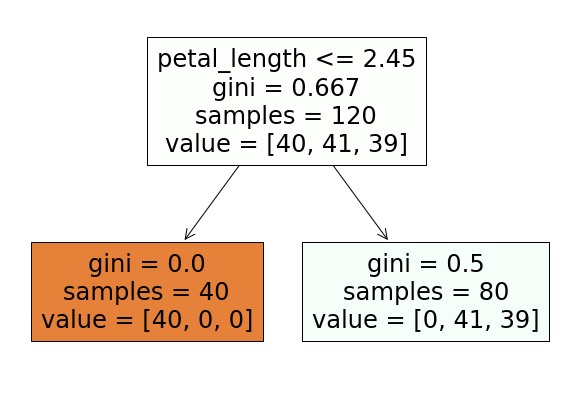

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt_clf, feature_names=["petal_length","petal_width"], filled=True);

Note que en este caso el primer *test* que se elige es: ¿Es la longitud del pétalo menor o igual a 2.45? Al nodo de la izquierda se van las instancias que responden positivamente al *test* y al nodo de la derecha las que responden negativamente. Esto representa separar nuestras instancias verticalmente en `petal_lenght=2.45`

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


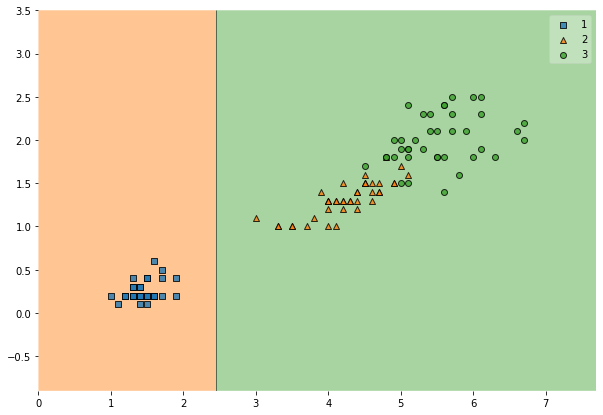

In [ ]:
plt.figure(figsize=(10,7))
plot_decision_regions(X_train.values, y_train.values, dt_clf);

Note que hemos separado las instancias en dos clases. Podemos construir un modelo más preciso repitiendo el proceso de buscar el mejor *test* en ambas regiones:


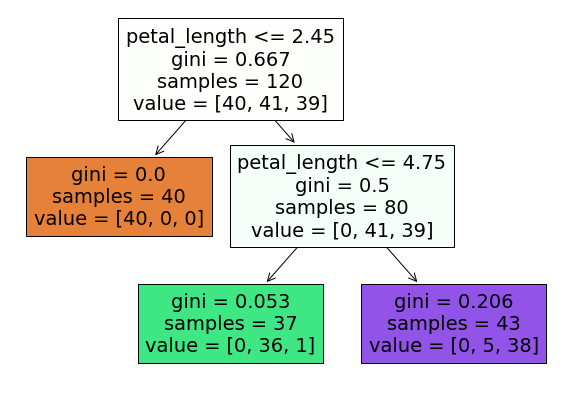

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=2).fit(X_train,  y_train)

plt.figure(figsize=(10,7))
plot_tree(dt_clf, feature_names=["petal_length","petal_width"], filled=True);

Vemos que el separamiento más informativo en la región de la derecha se da para un valor de `petal_lenght = 4.75`:

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


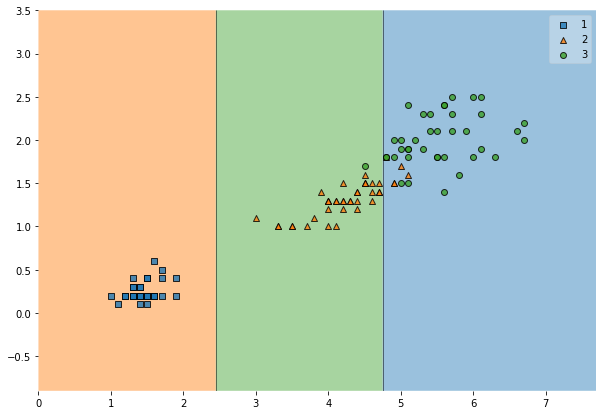

In [ ]:
plt.figure(figsize=(10,7))
plot_decision_regions(X_train.values, y_train.values, dt_clf);

Note que en este caso el modelo separa de mejor manera las instancias, pero todavía hay instancias de la clase 3 en la región 2. Podemos seguir en este proceso de forma iterativa para construir un modelo más complejo: 

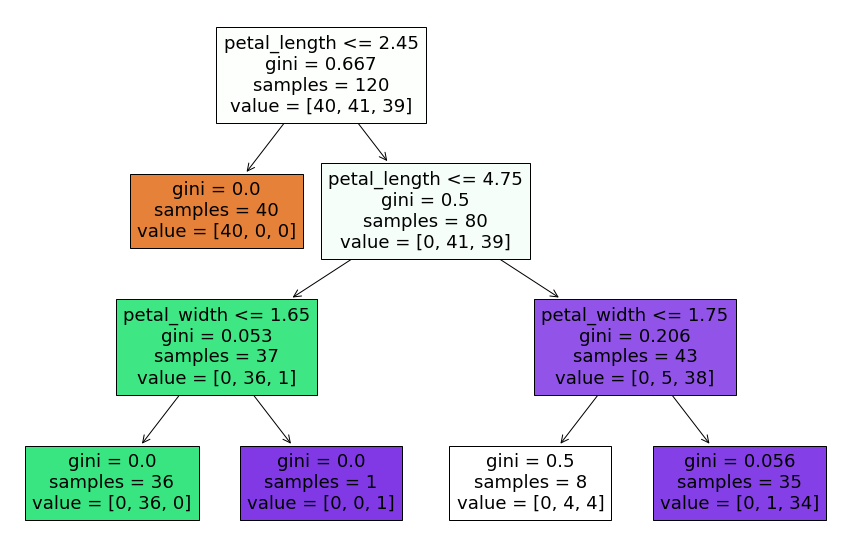

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=3).fit(X_train,  y_train)

plt.figure(figsize=(15,10))
plot_tree(dt_clf, feature_names=["petal_length","petal_width"], filled=True);

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


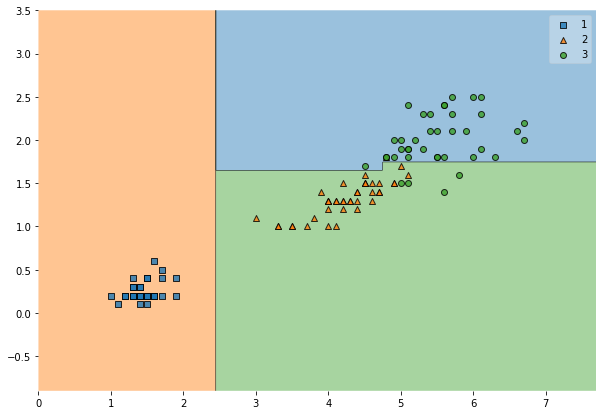

In [ ]:
plt.figure(figsize=(10,7))
plot_decision_regions(X_train.values, y_train.values, dt_clf);

La partición recursiva de los datos se repite hasta que cada región de la partición solo contiene un único valor objetivo, es decir, que las hojas sean hojas puras


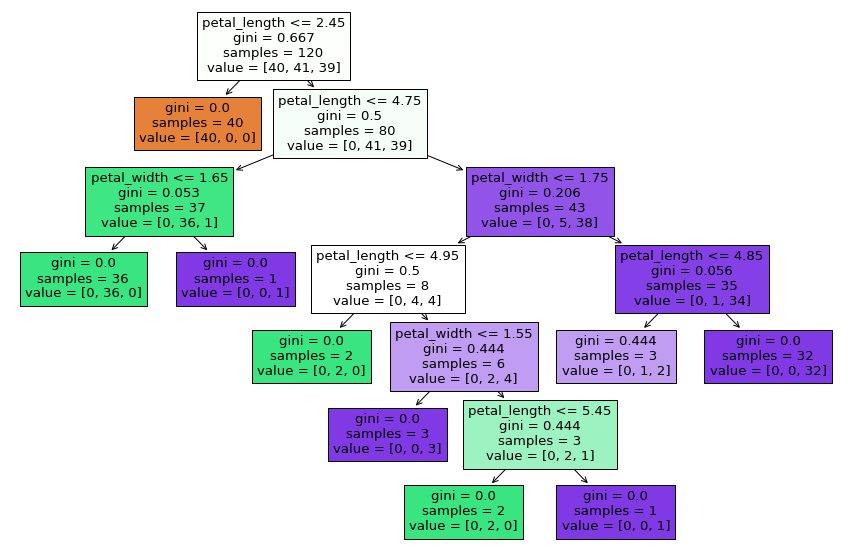

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=42).fit(X_train,  y_train)

plt.figure(figsize=(15,10))
plot_tree(dt_clf, feature_names=["petal_length","petal_width"], filled=True);

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


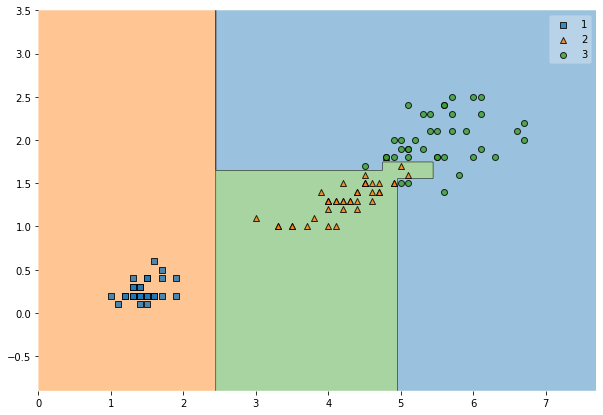

In [ ]:
plt.figure(figsize=(10,7))
plot_decision_regions(X_train.values, y_train.values, dt_clf);

La presencia de hojas puras significa que un árbol es 100 % preciso en el conjunto de entrenamiento. Por esta razón, los árboles de decisión son muy propensos a sobreajustar los datos.

Por lo general, la construcción de un árbol de decisión tal que todos los nodos terminales correspondan a hojas sean puras conduce a modelos que son muy complejos y que sobreajustan los datos. La presencia de hojas puras significa que un árbol es 100 % preciso en el conjunto de entrenamiento.

Hay dos estrategias comunes para evitar el sobreajuste: detener la creación del árbol en una etapa temprana (llamado pre-podado o *pre-pruning*), o construir el árbol y luego eliminar o colapsar los nodos que contienen poca información (también llamado pos-podado o *post-pruning*). Los posibles criterios para el pre-podado incluyen limitar la profundidad máxima del árbol (`max_depth`), limitar el número máximo de hojas (`max_leaf_nodes`) o requerir un número mínimo de instancias en un nodo para seguir particionandolo (`min_samples_split`). Sklearn sólo permite implementar el pre-podado (mediante los hiperparámetros del estimador) y no el pos-podado.

Podemos realizar una curva de validación para el hiperparámetro `max_depth` para ver cuál es la profundidad óptima del árbol de manera que no sobreajustemos los datos:




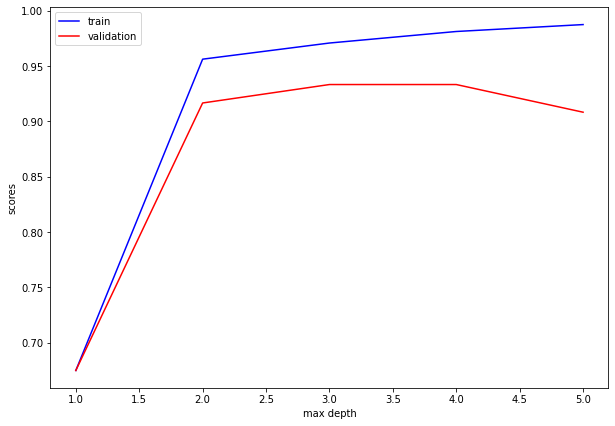

In [ ]:
para_range = range(1,6)

train, test = validation_curve(dt_clf, 
                               X_train, 
                               y_train,
                               param_name="max_depth",
                               param_range=para_range, cv=5)

plt.figure(figsize=(10,7))
plt.plot(para_range, np.mean(train, 1), "b", label="train")
plt.plot(para_range, np.mean(test, 1), "r", label="validation")
plt.xlabel("max depth")
plt.ylabel("scores")
plt.legend();

**importancia de las características**

En lugar de mirar el árbol completo, existen algunas propiedades útiles que podemos derivar para resumir el funcionamiento del árbol. 

El resumen más utilizado es la importancia de las características, que califica la importancia de cada característica para la decisión que toma un árbol. Es un número entre 0 y 1 para cada característica, donde 0 significa "no se usa en absoluto" y 1 significa "predice perfectamente el objetivo". Esta información la podemos encontrar en el atributo `feature_importances_`


In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Seleccionemos todas las características para el entrenamiento del modelo

In [ ]:
X = data.drop(columns="species")

dt_clf = DecisionTreeClassifier(random_state=42, max_depth=3).fit(X, y)

print("Feature", "\t", "Importance")
for feature, importance in zip(data.columns, dt_clf.feature_importances_):
  print(feature, "\t", importance)

Feature 	 Importance
sepal_length 	 0.0
sepal_width 	 0.0
petal_length 	 0.5856155514031495
petal_width 	 0.4143844485968506


Sin embargo, si una característica tiene una `feature_importance` baja, no significa que esta característica no sea informativa. Solo significa que la característica no fue seleccionada por el árbol, probablemente porque otra característica codifica la misma información. A diferencia de los coeficientes en los modelos lineales, la importancia de las características son siempre positivas y no codifican qué característica es indicativa de una clase particular.



**Entrenamiento**

Ahora, ¿qué criterio cuantitativo utiliza el algoritmo para construir el árbol? Sklearn utiliza el algoritmo de clasificación (CART) para entrenar árboles de decisión. La idea es simple: el algoritmo primero divide el conjunto de entrenamiento en dos subconjuntos usando una sola característica $k$ y un umbral $t_k$. ¿Cómo elige $k$ y $t_k$? Busca el par $(k, t_k)$ que produce los subconjuntos más puros (árboles con hojas más puras). La "pureza" se mide utilizando el coeficiente **Gini**


$$G = 1 - \sum_k P_{i,k}^2$$


Donde $P_{i,k}$ es la razón de la clase $k$ y las instancias en el nodo $i$-ésimo.

La función de costo que el algoritmo intenta minimizar está dada por

* **Función de costo (CART)**

$$J(k, t_k) = \frac{m_{izq}}{m} G_{izq} + \frac{m_{der}}{m} G_{der}$$

$m_{izq,der}$ el número de instancias en el nodo izquierdo/derecho y $t_k$  es el umbral de decisión.

En las visualizaciones que hemos hecho de los árboles aparece explícitamente el valor de $G$ asociado a cada nodo. Alternativamente podríamos utilizar otra medida cuantitativa conocida como la *entropia*, que podemos definir en el estimador utilizando el hiperparámetro `criterion=entropy`. Ambos criterios dan resultados muy similares. El *gini* suele ser más eficiente, aunque la entropía suele arrojar árboles más simétricos.

El problema principal con los árboles de decisión, a parte de su tendencia a sobreajustar los datos de entrenamiento, es que estos son muy sensibles a variaciones en los datos de entrenamiento, lo que hace que estos modelos sean muy inestables. 

Esto lo podemos ver si realizamos una validación cruzada:

In [ ]:
cross_val_score(dt_clf, X, y, cv=7)

array([0.95454545, 1.        , 0.90909091, 0.80952381, 0.95238095,
       0.95238095, 1.        ])

Note que se obtienen puntaje desde 0.8 hasta 0.95, lo que hace evidente la intestabilidad del modelo

En conclusion:

* **Ventajas:**
  * Fácil de usar e interpretar
  * Poderoso
  * Versatil

* **Desventajas:**
  * Resultados con alta varianza (sobreajuste)
  * Inestable (alta sensibilidad a los datos de entrenamiento)

<p><a name="ens"></a></p>

# **Métodos de ensamble**

Como acabamos de observar, un inconveniente principal de los árboles de decisión es que tienden a sobreajustar los datos de entrenamiento y son muy sensibles a los datos de entrenamiento. 

Los métodos de ensamble son modelos que combinan varios estimadores para crear modelos más potentes. Estos modelos son una forma de resover los problemas mencionados anteriormente. 

Esto se ve de forma clara si miramos cómo se maneja la compensación entre el sesgo la varianza: Asumamos que los datos reales se generan de un modelo con ruido intrínseco $\epsilon$:

$$y = f(x) + \epsilon$$

Si entrenamos múltiples estimadores el error final será:

$$\text{E} = \text{sesgo}^2 + \text{varianza} + \text{ruido} $$

* El sesgo mide la desviación del valor esperado de nuestro estimador del valor real.
* La varianza mide qué tanto nuestro estimador fluctua debido a efectos de datos finitos.

En el caso de los métodos de ensamble:

$$\text{varianza} = \rho(x) \sigma^2 + \frac{1-\rho(x)}{M} \sigma^2$$

donde $\rho$ mide la correlación de los estimadores y $M$ es el número de estimadores del ensamble. Por lo tanto, si se reduce al mínimo la correlación entre los estimadores $\rho(x)$ y se utiliza un número $M$ grande de estimadores, se minimizará la varianza del modelo, por lo que se resuelve el problema del sobreajuste y además se tendrían modelos más estables.



<p><a name="bag"></a></p>

## **Bagging**

**Bootstraping**

Para construir estos modelos de ensamble, primero realizamos lo que se conoce como un *bootstraping*: a partir del conjunto de datos original con $n$ instancias, elejimos una instancia al azar con reemplazo $n$ veces. Esto creará un conjunto de datos tan grande como el conjunto de datos original, pero con algunas instancias faltantes y algunas repetidas. La siguiente figura ilustra el muestreo con reemplazo:

![](https://i.imgur.com/vMf7CIu.png)

Podemos implementar este tipo de muestreo con reemplazo utilizando la clase `resample` del submódulo `utils` de sklearn:

In [ ]:
from sklearn.utils import resample 

data = np.arange(5,15)

boot = resample(data, replace=True)

print(f"Original Data: {data}")
print(f'Bootstrap Sample: {boot}')

Original Data: [ 5  6  7  8  9 10 11 12 13 14]
Bootstrap Sample: [ 5  5 13 11 13 13 13  5  7  8]


*Bagging* es una combinación de las palabras *Bootstrap* y *Aggregation* que se deriva de la técnica de muestreo *Bootstrapping* descrita anteriormente. La construcción de estos modelos de ensamble se da de la siguiente manera:

* Generar $n$ instancias $x^*_1, x^*_2,...,x^*_n$ con un muestreo con reemplazo (*bootstrapping*).
* Entrenar $n$ modelos $h_1, h_2,...,h_n$ con estas instancias
* Obtener la salida de cada modelo y realizar un proceso de agregación para obtener la salida (la media para la regresión y el valor más frecuente en clasifiación)


![](https://i.imgur.com/ULGLuQB.png)

El modelo que utilicemos puede ser cualquier clasificador *débil* de los que hemos utilizado. Podemos implementar este modelo de ensamble con el estimador `BaggingClassifier` del submódulo `ensemble` de Sklearn. El modelo a utilizar se elije utilizando el hiperparámetro `base_estimator` y el número de modelos con el hiperparámetro `n_estimators`. 

Por defecto, se utiliza un árbol de decisión como estimador base. La idea es que al construir muchos árboles, los cuales funcionan relativamente bien y donde cada uno de ellos sobreajusta los datos de diferentes maneras, podemos reducir la cantidad de sobreajuste promediando sus resultados. Esto se logra "inyectando" aleatoriedad en la construcción de cada árbol. El muestreo bootstrap conduce a que cada árbol de decisión se construya en un subconjunto de datos ligeramente diferente, con lo que se logra que cada árbol esté lo menos correlacionado posible con los demás.

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(n_estimators=100)

cross_val_score(bag_clf, X, y)

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

Note cómo en este caso se obtiene un modelo mucho más estable

<p><a name="bos"></a></p>

## **Bosques aleatorios**

Hay una ligera diferencia entre el bosque aleatorio y el *bagging*, y es que **los bosques aleatorios utilizan un subconjunto de las características** (por defecto se utiliza `max_features=sqrt(n_features)`), mientras que en el *bagging*, se consideran todas las características para la construcción del modelo. Esta característica, junto con el *bootstrapping*, garantiza que todos los árboles del bosque aleatorio sean diferentes.

Podemos implementar un bosque aleatorio con el estimador `RandomForestClassifier` de Sklearn.












In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=4)

cross_val_score(rf_clf, X, y)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

De manera similar al árbol de decisión, el bosque aleatorio proporciona información sobre la importancia de las características, que se calculan agregando las importancias de las características de los árboles en el bosque. 




In [ ]:
rf_clf.fit(X, y)

rf_clf.feature_importances_

array([0.11177161, 0.02156244, 0.42030529, 0.44636066])

Por lo general, las importancias proporcionadas por el bosque aleatorio son más confiables que las proporcionadas por un solo árbol

<p><a name="boo"></a></p>

## **Boosting**

El concepto de *Boosting* es ligeramente diferente al de *Bagging*. *Bagging* es un método de ensamble que utiliza modelos *débiles* en paralelo, mientras que el *Boosting* es un método de ensamble *secuencial*, lo cual significa que los modelos se construyen secuencialmente y donde cada modelo es una mejora del anterior.


![](https://i.imgur.com/IB3JboZ.png)

## **XGBoost**

[XGBoost](https://xgboost.readthedocs.io/en/latest/index.html) es un método de ensamble de tipo *Boosting* que es escalable para potenciar los árboles de decisión. El modelo de ensamble usa $K$ funciones aditivas para predecir la salida

$$
\hat y_i = \sum_{k=1}^K f_k(\mathbf{x}_i)
$$

donde $\mathbf{x}_i$ es la instancia i-ésima. Cada $f_k$ corresponde a una estructura de árbol independiente, donde el árbol $f_i$ depende del árbol $f_{i-1}$


![](https://i.imgur.com/WRY45bt.png)

Este método de ensamble está en la categoría de  *Gradient Boosting Decision Trees*. La "x" hace referencia a *extreme*, lo cual ilustra la complejidad del modelo que se evidencia en su alto número de hiperparámetros y capacidad predictiva. Por esta razón, entrenar este tipo de modelos suele ser más complejo. 

Podemos implementar el modelo utilizando la clase `XGBClassifier` del paquete `xgboost` 

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()

cross_val_score(xgb_clf, X, y)

array([0.96666667, 0.96666667, 0.93333333, 0.9       , 1.        ])

El factor más importante detrás del éxito de XGBoost es su escalabilidad en todos los escenarios. El sistema se ejecuta diez veces más rápido que las soluciones populares existentes en una sola máquina y escala a miles de millones de ejemplos en configuraciones distribuidas o con memoria limitada. La escalabilidad de XGBoost se debe a varios sistemas importantes y optimizaciones algorítmicas.



*¡Recuerde que todos estos modelos que hemos visto también se pueden implementar para tareas de regresión!*